**Project #3**    With exercises worked.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

If we want to save our data to google drive, we have to connect our Python notebook to our google drive account! Running this will ask us to confirm that we want this notebook to be able to access drive. This will also make a folder called 'Python4Physics' in your google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p "/content/drive/My Drive/Python4Physics"
filepath="drive/My Drive/Python4Physics/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Understanding the difference between basic types and composite types

In [ ]:
a = 5   # integers, floats, strings, boolean are basic types
b = a   # copy contents of a to b
b = 7   # setting variable b does not change value stored in a
print(f"a={a}")

a=5


In [ ]:
# Arrays an Lists are "mutable" types - you can modify parts
a = np.array([1.0, 2, 3.0, 4.0], dtype=np.float64) # A composite, like Lists, Dictionaries ...
b = a         # Take contents of a and put in b
b[1] = 77.0   # What happens to array in a when we modify the array via b
print(f"a={a}, changing second entry via b changes a too!")
#  Why do you think this is?  Why would the python inventor do this?
b = a.copy()
b[1] = 88.0   # try again
print(f"a={a}, this time b is a copy, so changing b has no effect")
print(f"b={b}, b did get changed")

a=[ 1. 77.  3.  4.], changing second entry via b changes a too!
a=[ 1. 77.  3.  4.], this time b is a copy, so changing b has no effect
b=[ 1. 88.  3.  4.], b did get changed


Composite types like arrays and lists reference data.    Assignments from one variable to another put a reference to the same object into the new variable.  Function call arguments work the same way.

# Important Numpy Concepts
Math operations on numpy arrays can act on all members of the array.
We can avoid using python loops and have faster code.


In [ ]:
alist = [1.2, 1, -2.2]   # a list of two floats and an integer, each entry can be different
b = np.array(alist, dtype=np.float64)  # all elements of an array are the same type, force type
c = np.array( [1.0, 2.0, 3.0], dtype=np.float64) # Convert 3 element list to numpy array
x = b * 2.0 # multiply all elements by 2.0
z = x + c   # adds element by element - must have same length
tot = np.sum(z)  # total elements of an array
print(f"z={z}, tot={tot}, len(z)={len(z)}")
ave = tot / len(z)
print(f"mean=np.tot(z)/len(z)={ave}")
# prebuilt version called mean
print(f"built in np.mean(z)={np.mean(z)}")

# We can even do things like take the sqrt of an array element by element
sqrtc = np.sqrt(c)
print(f"sqrtc={sqrtc}")

z=[ 3.4  4.  -1.4], tot=6.0, len(z)=3
mean=np.tot(z)/len(z)=2.0
built in np.mean(z)=2.0
sqrtc=[1.         1.41421356 1.73205081]


# Random Numbers

In [ ]:
# np.random.random(len) will generate an array of uniform random numbers between 0 and 1
randx = np.random.random(10)
print(f"randx={randx}")
# do it again and we independent random numbers from 0 to 1
randy = np.random.random(10)
print(f"randy={randy}")

# Lets make a function that makes random numbers ranging from -1 to +1
def randpm(count):
  x = np.random.random(count)
  x = x*2.0 - 1.0   # 0.0 -> -1.0, 0.5 -> ???,   1.0 -> +1.0
  return x

# Random numbers generators generate a sequence of numbers that are "uncorrelated"
# This means you can't guess information about the next number.
# We actually use pseudo-random number generator with a complicated
# algorithm to generate a the next number.   Pseudo-random generators take
# a seed value that determines the sequence of numbers so you can
# exactly replay calculations.
print()
print("Testing if setting the seed gives us the same set of numbers")
np.random.seed(19467)
randy = randpm(10)   # uniform random numbers in range [0,1]
print(f"rand with seed      ={randy}")
# If I want the same code to generate the same sequence I set the seed.
# This can be very useful for testing.
np.random.seed(19467)
randy = randpm(10)
print(f"rand with seed again={randy}")

randx=[0.45119216 0.78556249 0.63372122 0.44781051 0.44663971 0.87283322
 0.95262386 0.59253277 0.41299563 0.5283974 ]
randy=[0.31573171 0.15348225 0.16866566 0.10608006 0.12991714 0.44960294
 0.37440048 0.12877096 0.27774177 0.33921297]

Testing if setting the seed gives us the same set of numbers
rand with seed      =[-0.69818814 -0.65067905  0.12633974 -0.81224361 -0.57198455  0.99152846
 -0.63539685  0.72931404  0.87250041 -0.1046605 ]
rand with seed again=[-0.69818814 -0.65067905  0.12633974 -0.81224361 -0.57198455  0.99152846
 -0.63539685  0.72931404  0.87250041 -0.1046605 ]


Numpy has routines for computing mean and standard deviation.   Write your own, but you can use them to check your results.

In [ ]:
cnt = 1000000  # try bigger numbers
randx = randpm(cnt)
meanx = np.mean(randx)
stdx = np.std(randx, correction=1) # correction is subtracted from DOF for sample stddev
print(f"Mean,std of first 10 from randx: {meanx}, {stdx}")
randx = randpm(cnt) # get more numbers
meanx = np.mean(randx)
stdx = np.std(randx, correction=1)
print(f"Mean,std of second 10 from randy: {meanx}, {stdx}")
# Show that the std deviation is sqrt(1/3) as cnt -> inf

Mean,std of first 10 from randx: -0.00106236647244964, 0.5771844973044343
Mean,std of second 10 from randy: -4.709537312394566e-06, 0.5772214051888922


## Here we will determine pi using probability.

Consider a square of length 2, centered in the origin.
This square has an area of As = l^2 = 4

Inside this square, we can put a circle of radius 1,
which has an area of Ac = pi * r^2 = pi

Then, we will generate two random numbers inside the square:
    x in [-1,1]
    y in [-1,1]

The probability that this number is inside the circle is equal to
    Ac/As = pi / 4

By calculating a bunch of these random numbers, Nt,
if we label the ones that are inside the circle as Nc,
then then probability is also approximately equal to Nc/Nt

So we can solve for pi = 4 * Nc/Nt

In [ ]:
pi= np.pi
def sqrt(x): return np.sqrt(x)
def exp(x): return np.exp(x)

def calcpi(Nt):
    """
    This function calculates pi using probability.
    Nt is the number of trials
    """
    x0,y0=np.random.random(Nt),np.random.random(Nt) # generate two vectors of uniform [0,1] random values
    x = x0*2.0 - 1.0  # match x and y to [-1, 1]^2 box
    y = y0*2.0 - 1.0
    r = sqrt( pow(x,2) + pow(y,2) )  # compute distance from center for each vector entry

    "in condition"
    condition0 = r <1    # condition0 is a boolean array!
    xin = np.extract(condition0, x)
    yin = np.extract(condition0, y)

    "out condition"
    condition1 = r >=1
    xout = np.extract(condition1, x)
    yout = np.extract(condition1, y)

    pi_ran = 4.0* len(xin)/float(Nt)
    return xin,yin, xout,yout, pi_ran

Number of Samples=10
pi_ran=3.2
Number of Samples=15
pi_ran=3.2
Number of Samples=25
pi_ran=3.2
Number of Samples=39
pi_ran=3.076923076923077
Number of Samples=63
pi_ran=2.9206349206349205
Number of Samples=99
pi_ran=2.909090909090909
Number of Samples=158
pi_ran=3.1392405063291138
Number of Samples=251
pi_ran=3.1713147410358564
Number of Samples=398
pi_ran=3.185929648241206
Number of Samples=630
pi_ran=3.06031746031746
Number of Samples=999
pi_ran=3.131131131131131
Number of Samples=1584
pi_ran=3.1136363636363638
Number of Samples=2511
pi_ran=3.154121863799283
Number of Samples=3981
pi_ran=3.138909821652851
Number of Samples=6309
pi_ran=3.149786019971469
Number of Samples=9999
pi_ran=3.1487148714871487
Number of Samples=15848
pi_ran=3.153205451792024
Number of Samples=25118
pi_ran=3.137510948323911
Number of Samples=39810
pi_ran=3.1521728208992714
Number of Samples=63095
pi_ran=3.1411046834138996
Number of Samples=99999
pi_ran=3.139151391513915
Number of Samples=158489
pi_ran=3.137908

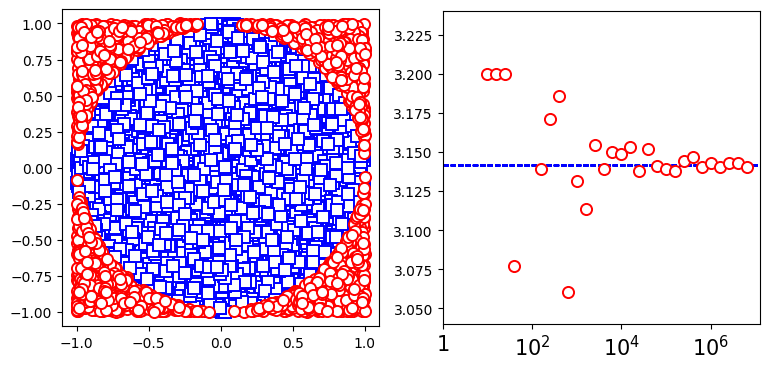

In [ ]:
method1 = 'y'
if method1 == 'y':
    plt.figure(figsize=(9,10))
    np.random.seed(19467)
    Nt = 50000
    miny,maxy = [3.04, 3.24]
    aspect122 = 7/(maxy - miny)

    plt.subplot(122, aspect=aspect122) # 2x2 array of plots, use upper right
    for exp0 in np.arange(1,7,.2):
        Nt = int(pow(10,exp0))
        print(f"Number of Samples={Nt}")

        # plt.subplot(122, aspect='equal') # 2x2 array of plots, use upper right
        plt.axhline(y=pi,color='b',linewidth=1,linestyle='dashed')

        xin,yin, xout,yout, pi_ran = calcpi(Nt)
        print(f"pi_ran={pi_ran}")
        #print(f"Nt={Nt:8}, pi_ran={pi_ran}")
        #plt.subplot(122)
        plt.errorbar(exp0, pi_ran,markersize=8,fmt='o',color='r',mfc='white',mec='r', elinewidth=2, capsize=4, mew=1.4)
        # Add lables along bottom of plot to show number of samples
        plt.xticks([0,2,4,6],['$1$','$10^2$','$10^4$','$10^6$'],size=15)
        # create display limits for our estimates of pi
        plt.ylim([3.04,3.24])

    Nt = 10000
    xin,yin, xout,yout, pi_ran = calcpi(Nt)
    plt.subplot(121, aspect='equal') # 2x2 array of plots, select upper left
    plt.errorbar(xin,yin,markersize=8,fmt='s',color='b',mfc='white',mec='b', elinewidth=2, capsize=4, mew=1.4)
    plt.errorbar(xout,yout,markersize=8,fmt='o',color='r',mfc='white',mec='r', elinewidth=2, capsize=4, mew=1.4)
plt.savefig('./pi_1pcnt_part1.pdf',
                bbox_inches='tight',
                transparent=True)

NumSamples=      10, mean=3.1288000000, std=0.4979019710
NumSamples=     100, mean=3.1508000000, std=0.1556786166
NumSamples=    1000, mean=3.1427520000, std=0.0511878392
NumSamples=   10000, mean=3.1415080000, std=0.0175516603
NumSamples=  100000, mean=3.1418014400, std=0.0049327239
NumSamples= 1000000, mean=3.1417147680, std=0.0016798876
pi0=3.1417147680000004, dpi0=0.0016798875863525938


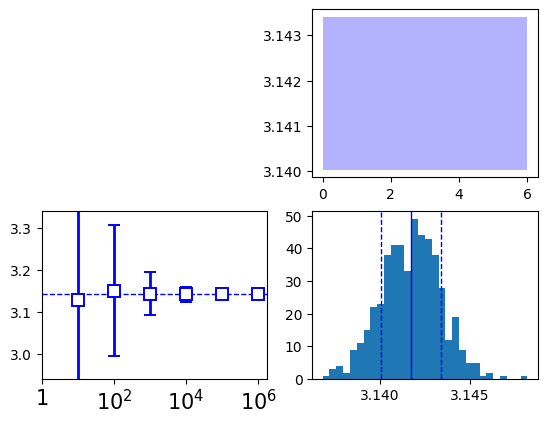

In [ ]:
method2 = 'y'
if method2 == 'y':
    #plt.figure(figsize=(10,5))
    # 223 means 2x2 array of plots were the 3rd plot is selected.
    # we count along rows, moving to the next row when we hit the end of the row
    plt.subplot(223)
    # plt.subplot(2, 2, 3) # This is a more general way to specify
    plt.axhline(y=pi,color='b',linewidth=1,linestyle='dashed')

    # Repeat monte-carlo experiment with increasing numbers of samples
    # We use 500*10^exp0 numbers of samples with exp0 going through 1,2,3,4,5,6
    for exp0 in np.arange(1,7,1):   # start at 1, stop *before* 7, step by 1.
        Nt = int(pow(10,exp0))
        pis = []   # collect our results here.
        attempts =500

        for attempt in np.arange(attempts):
            xin,yin, xout,yout, pi0 = calcpi(Nt)
            pis.append(pi0)

        pi0 = np.mean(np.array(pis))
        dpi0 = np.std(np.array(pis),ddof=1)
        print(f"NumSamples={Nt:8}, mean={pi0:12.10f}, std={dpi0:12.10f}")
        plt.subplot(223)
        # add point to plot with an error bar.
        plt.errorbar(exp0,pi0,yerr=dpi0,markersize=8,fmt='s',color='b',mfc='white',mec='b', elinewidth=2, capsize=4, mew=1.4)
    plt.xticks([0,2,4,6],['$1$','$10^2$','$10^4$','$10^6$'],size=15)
    print(f"pi0={pi0}, dpi0={dpi0}")
    plt.ylim([2.94,3.34])
    plt.subplot(222)

    x=np.arange(7)
    ym = np.ones(7)*(pi0-dpi0)
    yp = np.ones(7)*(pi0+dpi0)
    plt.fill_between(x,ym,yp,facecolor='b',alpha=.3)

    pis = np.array(pis)
    plt.subplot(224)
    Nbins=30
    plt.hist(pis, bins=Nbins)  # Histogram plot
    # we can add graphics to a plot
    # add mean line to lower right plot
    plt.axvline(x=pi0,color='b',linewidth=1)
    # add plus 1 stddev line to plot
    plt.axvline(x=pi0+dpi0,color='b',linewidth=1,linestyle='dashed')
    # add minus 1 stddev line to plot
    plt.axvline(x=pi0-dpi0,color='b',linewidth=1,linestyle='dashed')


plt.savefig('./pi_1pcnt_final.pdf',
                bbox_inches='tight',
                transparent=True)